# Neural Networks using Tensorflow
* We'll build a two-layered Neural Network using TensorFlow and Keras' API.
* We'll use it to predict House Prices (California dataset).
*

## Step 1: Loading the dataset and splitting into training and testing
* Scaling is required since we're dealing with a form of Gradient descent

In [1]:
import numpy as np
from sklearn import preprocessing
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()

# The last 10 samples will be the testing set
num_test = 10

scaler = preprocessing.StandardScaler()

# Splitting into training and testing set and scaling
X_train = california_housing.data[:-num_test, :]
X_train = scaler.fit_transform(X_train)
y_train = california_housing.target[:-num_test].reshape(-1, 1)

X_test = california_housing.data[-num_test:, :]
X_test = scaler.transform(X_test)
y_test = california_housing.target[-num_test:]


## Step 2: Building the model
* We'll use the tf.keras.Sequential model: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
* We'll increase the amount of Neurons in the Hidden Layers to 32 and 16
respectively
* We'll use ReLU as the activation function and the Adam Optimizer
* The Loss function will be MSE

In [2]:
# Building the model using TensorFlow and Keras
import tensorflow as tf


learning_rate = 0.001
epochs = 225

nn_tensorflow = tf.keras.Sequential([
    # The hidden layers
    tf.keras.layers.Dense(16, activation = 'relu', input_shape = [X_train
                          .shape[1],]),
    tf.keras.layers.Dense(8, activation = 'relu'),
    # The output layer
    tf.keras.layers.Dense(1)
])

# Compiling the model
nn_tensorflow.compile(optimizer = tf.keras.optimizers.Adam(learning_rate =
                                                           learning_rate),
                      loss = tf.keras.losses.MeanSquaredError())

# Fitting the model
nn_tensorflow.fit(X_train, y_train, epochs = epochs, verbose = 1)

Epoch 1/225
645/645 [==============================] - 1s 1ms/step - loss: 1.3016
Epoch 2/225
645/645 [==============================] - 1s 1ms/step - loss: 0.4362
Epoch 3/225
645/645 [==============================] - 1s 1ms/step - loss: 0.3938
Epoch 4/225
645/645 [==============================] - 1s 1ms/step - loss: 0.3810
Epoch 5/225
645/645 [==============================] - 1s 1ms/step - loss: 0.3660
Epoch 6/225
645/645 [==============================] - 1s 1ms/step - loss: 0.3596
Epoch 7/225
645/645 [==============================] - 1s 1ms/step - loss: 0.3524
Epoch 8/225
645/645 [==============================] - 1s 1ms/step - loss: 0.3482
Epoch 9/225
645/645 [==============================] - 1s 1ms/step - loss: 0.3434
Epoch 10/225
645/645 [==============================] - 1s 1ms/step - loss: 0.3389
Epoch 11/225
645/645 [==============================] - 1s 1ms/step - loss: 0.3394
Epoch 12/225
645/645 [==============================] - 1s 1ms/step - loss: 0.3321
Epoch 13/225


645/645 [==============================] - 1s 1ms/step - loss: 0.2734
Epoch 100/225
645/645 [==============================] - 1s 1ms/step - loss: 0.2739
Epoch 101/225
645/645 [==============================] - 1s 1ms/step - loss: 0.2746
Epoch 102/225
645/645 [==============================] - 1s 1ms/step - loss: 0.2756
Epoch 103/225
645/645 [==============================] - 1s 1ms/step - loss: 0.2735
Epoch 104/225
645/645 [==============================] - 1s 1ms/step - loss: 0.2738
Epoch 105/225
645/645 [==============================] - 1s 1ms/step - loss: 0.2745
Epoch 106/225
645/645 [==============================] - 1s 1ms/step - loss: 0.2791
Epoch 107/225
645/645 [==============================] - 1s 1ms/step - loss: 0.2734
Epoch 108/225
645/645 [==============================] - 1s 1ms/step - loss: 0.2727
Epoch 109/225
645/645 [==============================] - 1s 1ms/step - loss: 0.2737
Epoch 110/225
645/645 [==============================] - 1s 1ms/step - loss: 0.2732
Epoch 

645/645 [==============================] - 1s 1ms/step - loss: 0.2703
Epoch 197/225
645/645 [==============================] - 1s 1ms/step - loss: 0.2674
Epoch 198/225
645/645 [==============================] - 1s 1ms/step - loss: 0.2695
Epoch 199/225
645/645 [==============================] - 1s 1ms/step - loss: 0.2683
Epoch 200/225
645/645 [==============================] - 1s 1ms/step - loss: 0.2709
Epoch 201/225
645/645 [==============================] - 1s 1ms/step - loss: 0.2684
Epoch 202/225
645/645 [==============================] - 1s 1ms/step - loss: 0.2682
Epoch 203/225
645/645 [==============================] - 1s 992us/step - loss: 0.2692
Epoch 204/225
645/645 [==============================] - 1s 1ms/step - loss: 0.2686
Epoch 205/225
645/645 [==============================] - 1s 1ms/step - loss: 0.2687
Epoch 206/225
645/645 [==============================] - 1s 961us/step - loss: 0.2690
Epoch 207/225
645/645 [==============================] - 1s 1ms/step - loss: 0.2682
Ep

## Final step: Predicting and evaluating
* First we'll define a prediction function
* We'll then evaluate the model using the MSE, MAE and R2 metrics


In [3]:
# Applying the training model to our testing set
predictions = nn_tensorflow.predict(X_test)

# Printing out the predictions and their ground truths to compare them
print(predictions)
print(y_test)

1/1 [==============================] - 0s 75ms/step
[[1.2403252 ]
 [1.2607255 ]
 [1.2587198 ]
 [0.9928981 ]
 [1.3409032 ]
 [0.80547845]
 [1.0304263 ]
 [0.9127579 ]
 [0.9590843 ]
 [1.0068347 ]]
[1.12  1.072 1.156 0.983 1.168 0.781 0.771 0.923 0.847 0.894]


In [4]:
# Evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 score: {r2}")



Mean Absolute Error: 0.11136376438140867
Mean Squared Error: 0.018394095049367468
R2 score: 0.10397931430622709


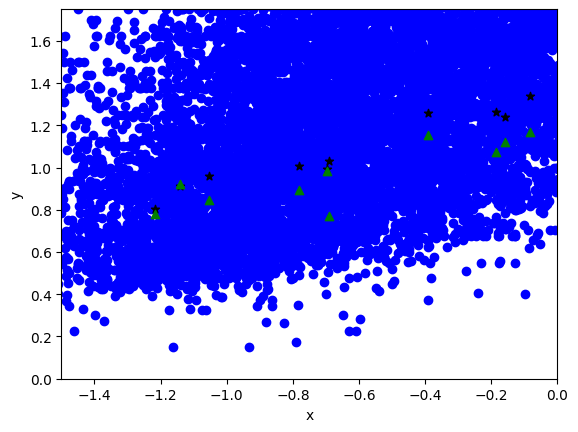

In [5]:
# Visualizing predicted vs true values
import matplotlib.pyplot as plt

# Plotting both the train values and the new predicted values
plt.scatter(X_train[:, 0], y_train, marker = "o", c = "b")
plt.scatter(X_test[:, 0], predictions, marker = "*", c = "k")
plt.scatter(X_test[:, 0], y_test, marker = "^", c = "g")

plt.xlim(-1.5, 0)
plt.ylim(0, 1.75)

plt.xlabel("x")
plt.ylabel("y")

plt.show()